In [1]:
import turboprop as tp
from nn import Sequential, Dense

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1)
y = y * 2 - 1 # make it -1 or 1
print(X.shape, y.shape)

(100, 2) (100,)


In [3]:
import matplotlib.pyplot as plt

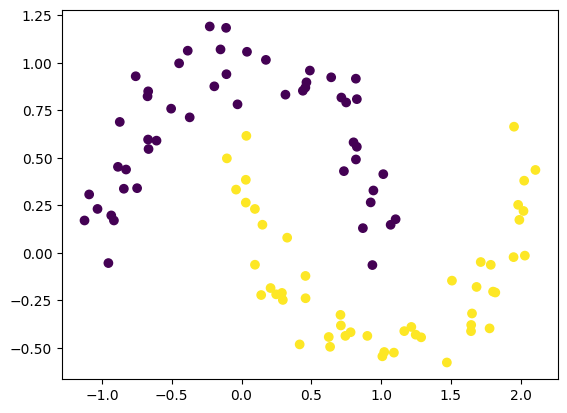

In [4]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y)

In [107]:
model = Sequential([
    Dense(2, 8),
    #Dense(16, 16),
    Dense(8, 1, relu=False)
    ])

In [108]:
def get_loss():
    loss = 0
    acc = 0
    for ind in range(X.shape[0]):
        x = X[ind]
        y_true = y[ind]
        y_pred = model(x)[0]

        #loss += -(y * y_pred.log() + (1 - y) * (1 - y_pred).log())
        # svm "max-margin" loss
        loss += (1 + (y_pred * -y_true)).relu()
        acc += (y_true > 0) == (y_pred.value > 0)

    return loss / X.shape[0], acc / X.shape[0]


In [118]:
n_epoch = 20
alpha = 5e-1
for epoch in range(n_epoch):
    model.zero_grad()
    loss, acc = get_loss()
    if epoch % 5 == 0:
        print(f'{loss=}, {acc=}')
    loss.backward()
    for p in model.parameters():
        p.value -= alpha * p.grad





loss=Scalar(0.0164282756689522), grad=0, acc=1.0
loss=Scalar(0.016360933922144546), grad=0, acc=1.0
loss=Scalar(0.015756866677296488), grad=0, acc=1.0
loss=Scalar(0.016004736048027064), grad=0, acc=1.0


In [119]:
import numpy as np
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
#inputs = [list(map(Value, xrow)) for xrow in Xmesh]
inputs = [xrow for xrow in Xmesh]

scores = list(map(model, inputs))
#scores

(-1.5768165078940863, 2.1731834921059137)

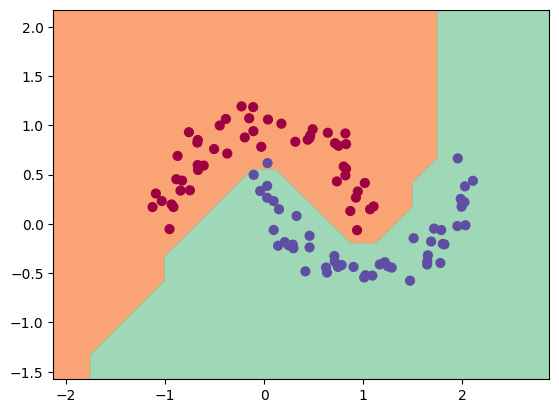

In [120]:
Z = np.array([s[0].value > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
